In [707]:
# Importing the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


# Step-1: Gathering Data

In [708]:
# Reading the dengue data 
data = pd.read_excel('Data/DengueAndClimateBangladesh.xlsx')


# Step-2: Data preprocessing

In [709]:
data.set_index('Month', inplace=True)
# Checking for some values of the data
df=data.copy()
df.head()

,Dengue Cases
Month,
2008-01-01,0
2008-02-01,0
2008-03-01,0
2008-04-01,0
2008-05-01,0


# Step-3: Exploratory Data Analysis (EDA)

In [710]:
# printing information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2008-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Dengue Cases  192 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [711]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dengue Cases,192.0,2828.359375,10934.576551,0.0,7.0,69.0,414.25,79598.0


### Visual test

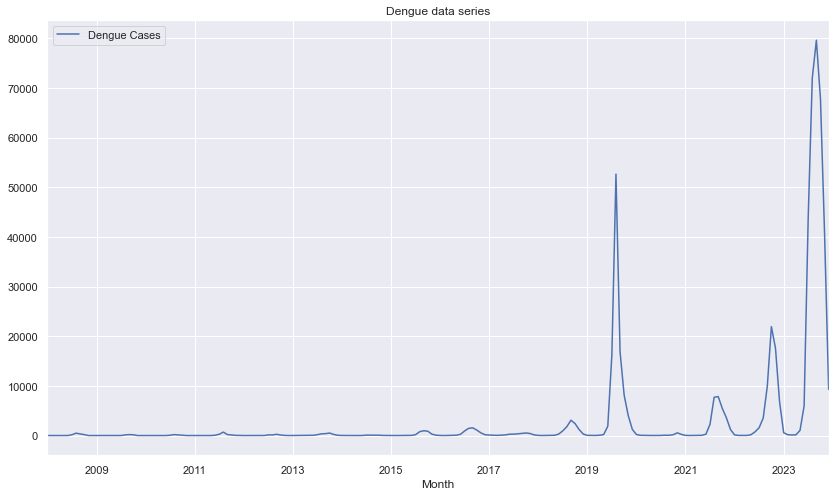

In [712]:
data = df.copy()
data.plot(figsize=(14,8), title='Dengue data series')
sns.set(style='dark')
plt.grid()
plt.show()

<font color ='red'>Note: </font> Although its very clear that we have a trend (varying mean) in the above series, this visual approach might not always give accurate results. It is better to confirm the observations using some statistical tests.

# Step-4: Performing the ADF test on the series

In [713]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [714]:
# Taking out the passengers number as a series.
series = df['Dengue Cases'].values
series

array([    0,     0,     0,     0,     0,     0,   160,   473,   334,
         184,     0,     0,     0,     0,     0,     0,     1,     0,
           4,   125,   188,   154,     0,     0,     0,     0,     0,
           0,     0,     0,    61,   183,   120,    45,     1,     0,
           0,     0,     0,     0,     0,    61,   255,   691,   193,
         114,    36,     9,     0,     0,     0,     0,     0,    10,
         129,   122,   246,   107,    27,     0,     6,     7,     3,
           3,    12,    50,   172,   339,   385,   501,   218,    53,
          15,     7,     2,     0,     8,     9,    82,    80,    76,
          63,    22,    11,     0,     0,     2,     6,    10,    28,
         171,   765,   965,   869,   271,    75,    13,     3,    17,
          38,    70,   254,   926,  1451,  1544,  1077,   522,   145,
          92,    58,    36,    73,   134,   267,   286,   346,   430,
         512,   409,   126,    26,     7,    19,    29,    52,   295,
         946,  1796,

In [715]:
# ADF Test
ADF_test = adfuller(series, autolag='AIC')
ADF_test

(-0.30293180549616705,
 0.9250880732150504,
 8,
 183,
 {'1%': -3.466598080268425,
  '5%': -2.8774669520682674,
  '10%': -2.5752604356654425},
 3536.2011685367597)

The null and alternate hypothesis of this test are: 

* Null Hypothesis: The series has a unit root (value of a =1)
    
* Alternate Hypothesis: The series has no unit root.


* Ho: It is non stationary

* H1: It is stationary

If we fail to reject the null hypothesis, we can say that the series is non-stationary.

In [716]:
def adfuller_test(Cases):
    ADF_test=adfuller(Cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(ADF_test,labels):
        print(label+' : '+str(value) )
    if ADF_test[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [717]:
adfuller_test(series)

ADF Test Statistic : -0.30293180549616705
p-value : 0.9250880732150504
#Lags Used : 8
Number of Observations Used : 183
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


 <font color ='red'>Note: </font> Here in the results, we can see that the p-value for time series is greater than 0.05, and we can say we fail to reject the null hypothesis and the time series is non-stationary. 

## Differencing

In [718]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df['Differenced'] = df['Dengue Cases'].diff(1)  # First-order differencing
df['Seasonal_Differenced'] = df['Differenced'].diff(12)  # Seasonal differencing

In [719]:
# Applying test dickey fuller test
adfuller_test(df['Seasonal_Differenced'].dropna())

ADF Test Statistic : -5.407121201689916
p-value : 3.27248177621712e-06
#Lags Used : 11
Number of Observations Used : 167
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Accoording to Dfuller test I=d=1

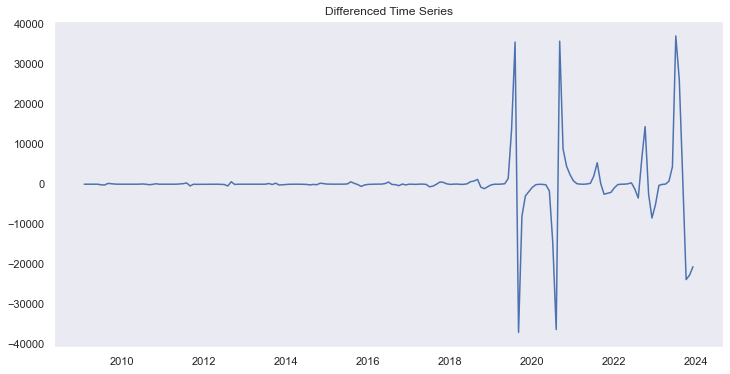

In [720]:
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Seasonal_Differenced'])
plt.title('Differenced Time Series')
plt.show()

# Step-5: Applying Auto Regressive Model

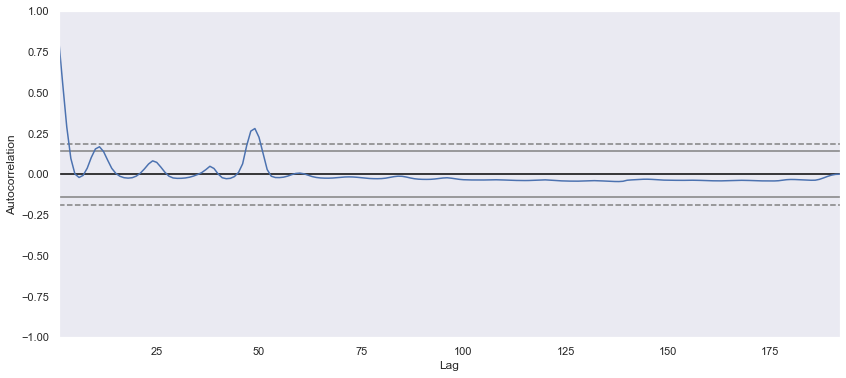

In [721]:
from pandas.plotting import autocorrelation_plot
plt.subplots(figsize=(14,6))
autocorrelation_plot(df['Dengue Cases'])
sns.set(style='dark')
plt.grid()
plt.show()

In [722]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

* Identification of an AR model is often best done with the PACF.
* Identification of an MA model is often best done with the ACF rather than the PACF.

<Figure size 864x288 with 0 Axes>

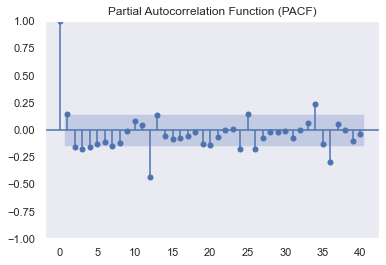

In [723]:
# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(df['Seasonal_Differenced'].iloc[13:], lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()

According to PACF plot AR=p=1

<Figure size 864x288 with 0 Axes>

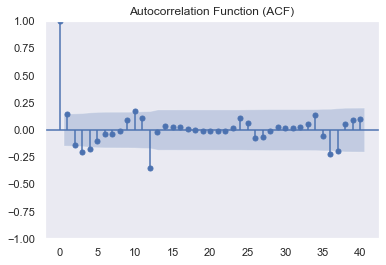

In [724]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(df['Seasonal_Differenced'].iloc[13:], lags=40, title='Autocorrelation Function (ACF)')
plt.show()

According to PACF plot MA=q=1

Note: ARIMA should be selected when data is not Seasonal

# Step-6: Spliting Train And Test Datasett

In [725]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [726]:
train_size = int(len(df['Dengue Cases']) * 0.8)  # 80% for training
train_size

153

In [727]:
train, test = df['Dengue Cases'].iloc[:train_size], df['Dengue Cases'].iloc[train_size:]

# Step-7: Applying ARIMA Model

In [728]:
import statsmodels.api as sm

In [729]:
model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
fit_model=model.fit()

### Forecasting

In [730]:
# Forecasting on the test set
forecast = fit_model.forecast(steps=len(test))
forecast

2020-10-01     1127.938447
2020-11-01      885.949104
2020-12-01      537.491558
2021-01-01      582.822415
2021-02-01      723.539587
2021-03-01      811.918135
2021-04-01      903.036012
2021-05-01     1066.776748
2021-06-01     2777.327345
2021-07-01    17160.161433
2021-08-01    53543.904868
2021-09-01    17813.344629
2021-10-01     9071.480972
2021-11-01     4923.006606
2021-12-01     2149.787057
2022-01-01     1096.564932
2022-02-01      939.579894
2022-03-01      919.893293
2022-04-01      916.950985
2022-05-01      901.441703
2022-06-01      911.410709
2022-07-01      916.533896
2022-08-01      967.232950
2022-09-01      940.485245
2022-10-01     2019.827273
2022-11-01     1777.198099
2022-12-01     1428.344404
2023-01-01     1473.494749
2023-02-01     1614.161449
2023-03-01     1702.521080
2023-04-01     1793.623012
2023-05-01     1957.334632
2023-06-01     3667.613762
2023-07-01    18048.155066
2023-08-01    54426.104876
2023-09-01    18701.237780
2023-10-01     9960.940146
2

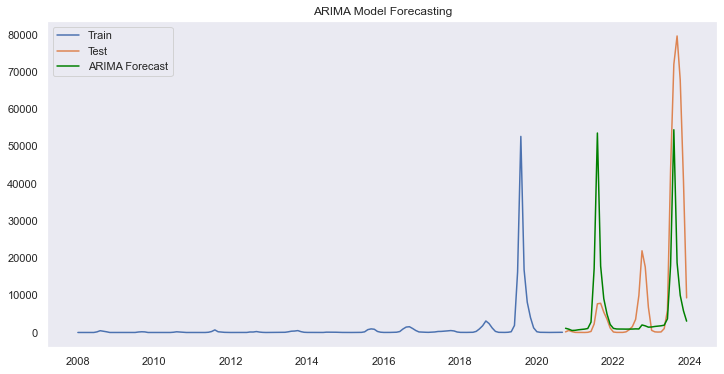

In [731]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='green')
plt.title('ARIMA Model Forecasting')
plt.legend()
plt.show()

# Step-8: Accuracy Testing

In [732]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [733]:
# Assuming 'test' is your test set and 'forecast' is the predicted values
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 9091.472915014814
Mean Squared Error (MSE): 320794419.3378128
Root Mean Squared Error (RMSE): 17910.73475147831


# Step-9: Forecasting for the years 2024 to 2026

In [734]:
# Forecasting for the years 2024 to 2026
future_years = pd.date_range(start='2024-01-01', end='2026-12-31', freq='M')
forecast = fit_model.forecast(steps=len(future_years))

In [735]:
# Creating a DataFrame for the forecast
forecast_df = pd.DataFrame({'Month': future_years, 'Dengue Cases Forecast': forecast})
forecast_df.set_index('Month', inplace=True)

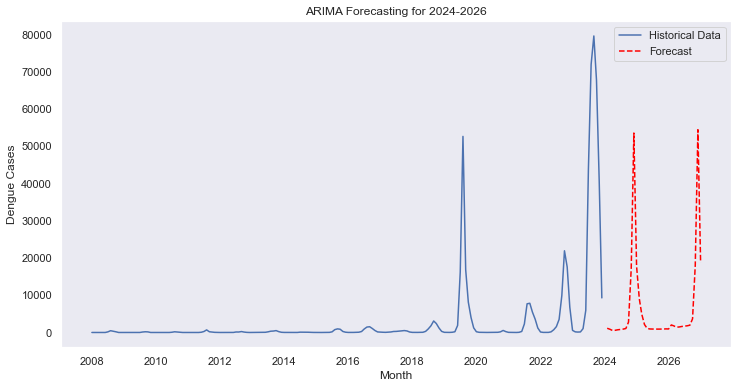

In [736]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Dengue Cases'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Dengue Cases Forecast'], label='Forecast', color='red',linestyle='--')
plt.title('ARIMA Forecasting for 2024-2026')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

In [737]:
# Displaying the forecast DataFrame for the years 2024 to 2026
forecast_df

,Dengue Cases Forecast
Month,
2024-01-31,1127.938447
2024-02-29,885.949104
2024-03-31,537.491558
2024-04-30,582.822415
2024-05-31,723.539587
2024-06-30,811.918135
2024-07-31,903.036012
2024-08-31,1066.776748
2024-09-30,2777.327345
